# Introduction
The Bay Area's bike share system is called Ford GoBike. Bay Area Bike Share began as a regional trial program in 2013, with 700 bikes and 70 stations spread across San Francisco and San Jose. Ford GoBike will have 7,000 bikes throughout San Francisco, the East Bay, and San Jose after the expansion is complete.
Ford GoBike, like other bike sharing systems, is made up of a fleet of specifically built, strong, and durable bikes that are docked at various locations across the city. The bikes may be unlocked at any station in the system and returned to any other, making them perfect for one-way excursions. Bike share is used to travel to work or school, do errands, and attend appointments.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import os
import datetime

## Dataset Overview

My source data was Ford GoBike System Data: https://www.fordgobike.com/system-data This data collection contains data about individual bike-sharing system trips. If a complete year of coverage is needed, multiple data files will need to be linked together. This document delves into the public trip data for the Ford GoBike, which includes about 1,850,000 bike rides from FY2018. The trip start/end time, but also additional variables like user type, gender, and age, were all included in the data.

In [7]:
df_cleaned= pd.read_csv('df_cleaned.csv')

In [8]:
df_cleaned.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_day,start_time_hour,distance
5549,263,2019-02-28 11:46:07.061,2019-02-28 11:50:31.016,245.0,Downtown Berkeley BART,37.870139,-122.268422,256.0,Hearst Ave at Euclid Ave,37.875112,...,5718,Subscriber,1989,Male,No,32,February,Thu,11,0.884747
69954,341,2019-02-19 09:18:26.028,2019-02-19 09:24:07.955,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,5844,Subscriber,1973,Male,No,48,February,Tue,9,1.060207
119116,1194,2019-02-10 13:24:14.826,2019-02-10 13:44:08.872,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,31.0,Raymond Kimbell Playground,37.783813,...,5217,Subscriber,1989,Male,No,32,February,Sun,13,2.798367
73244,282,2019-02-18 18:51:34.877,2019-02-18 18:56:17.837,121.0,Mission Playground,37.759210,-122.421339,356.0,Valencia St at Clinton Park,37.769188,...,1488,Subscriber,1981,Male,No,40,February,Mon,18,1.112601
31993,1161,2019-02-24 07:47:41.377,2019-02-24 08:07:03.014,96.0,Dolores St at 15th St,37.766210,-122.426614,6.0,The Embarcadero at Sansome St,37.804770,...,5185,Subscriber,1994,Male,No,27,February,Sun,7,4.754494
100624,1011,2019-02-13 07:54:37.061,2019-02-13 08:11:28.283,375.0,Grove St at Masonic Ave,37.774836,-122.446546,101.0,15th St at Potrero Ave,37.767079,...,4426,Subscriber,1993,Female,No,28,February,Wed,7,3.550755
20058,506,2019-02-26 09:19:13.357,2019-02-26 09:27:40.324,368.0,Myrtle St at Polk St,37.785434,-122.419622,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,...,6516,Subscriber,1990,Male,Yes,31,February,Tue,9,1.888953
132876,353,2019-02-07 16:10:35.074,2019-02-07 16:16:28.846,88.0,11th St at Bryant St,37.770030,-122.411726,58.0,Market St at 10th St,37.776619,...,4452,Subscriber,1987,Male,No,34,February,Thu,16,0.885573
149877,369,2019-02-05 14:49:38.610,2019-02-05 14:55:48.286,114.0,Rhode Island St at 17th St,37.764478,-122.402570,104.0,4th St at 16th St,37.767045,...,3652,Subscriber,1981,Female,No,40,February,Tue,14,1.070407
127560,112,2019-02-08 08:48:18.626,2019-02-08 08:50:11.422,138.0,Jersey St at Church St,37.750900,-122.427411,134.0,Valencia St at 24th St,37.752428,...,5438,Subscriber,1993,Male,No,28,February,Fri,8,0.620117


### When are most trips taken in terms of time of day and day of the week?

<AxesSubplot:title={'center':'The are most trips taken in terms of day of the week'}, xlabel='start_time_hour', ylabel='count'>

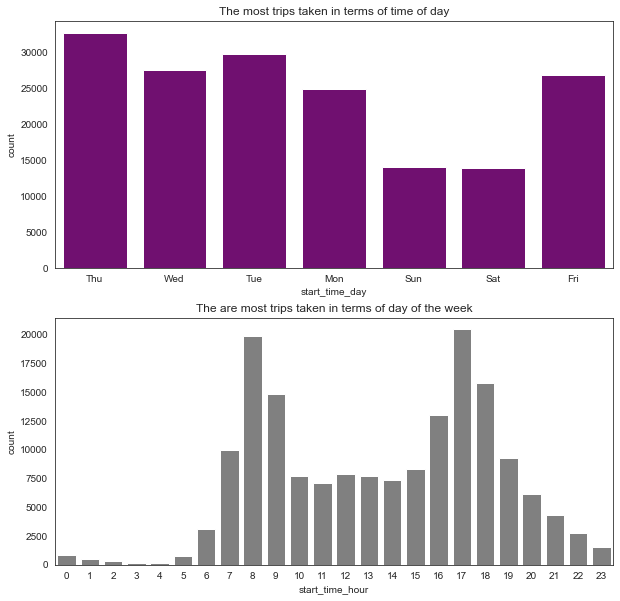

In [23]:
sns.set_style('white')
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = [10, 10])
ax1.set_title('The most trips taken in terms of time of day')
ax2.set_title('The are most trips taken in terms of day of the week')
sns.countplot(data = df_cleaned, x = 'start_time_day', color = 'purple', ax = ax1)
sns.countplot(data = df_cleaned, x = 'start_time_hour', color = 'gray', ax = ax2)

- People tend to not go in bike trips during the weekends
- People tend to go for bike trips early in the morning and the hours before the sunset

### What is the count of trips for each user type?

[Text(0.5, 0, 'Type of user'), Text(0, 0.5, 'Count of rides')]

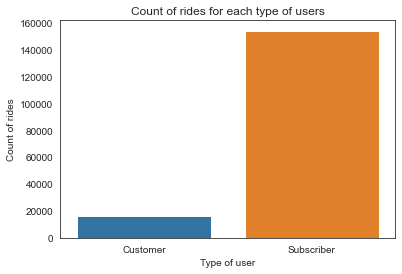

In [10]:
b=sns.countplot(data = df_cleaned, x = 'user_type');
plt.title('Count of rides for each type of users')
b.set(xlabel='Type of user', ylabel='Count of rides')

- Subscribers have x8 more count of rides than customers

### What are the ages of bike riders?

[Text(0.5, 0, 'Age')]

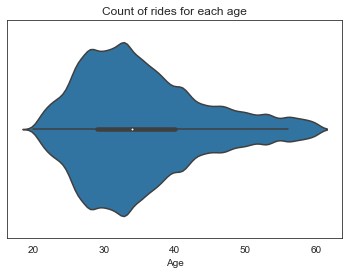

In [11]:
c=sns.violinplot(data = df_cleaned, x = 'member_age');
plt.title('Count of rides for each age')
c.set(xlabel='Age')

- People in their early 30s make the majority of rides count.

### What gender travelled more?

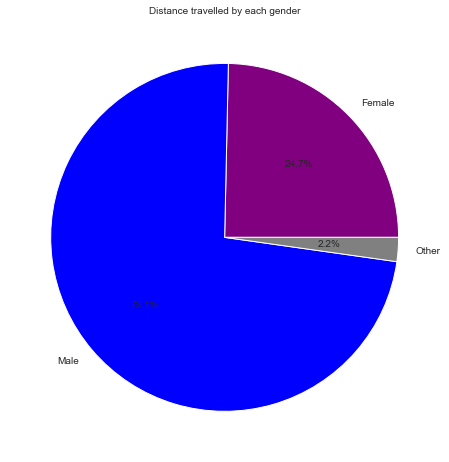

In [12]:
plt.figure(figsize= [8,8])
a = df_cleaned[df_cleaned.member_gender == 'Female'].distance.sum()
b = df_cleaned[df_cleaned.member_gender == 'Male'].distance.sum()
c = df_cleaned[df_cleaned.member_gender == 'Other'].distance.sum()

plt.pie([a, b,c], autopct='%1.1f%%', labels=['Female', 'Male','Other'], colors=["purple","blue", "gray"])
plt.title("Distance travelled by each gender", fontsize=10)
plt.show()

- Females make around quarter of the total distance traveled while males travel almost x3 more.

### Is the count of riders affected by gender and age?

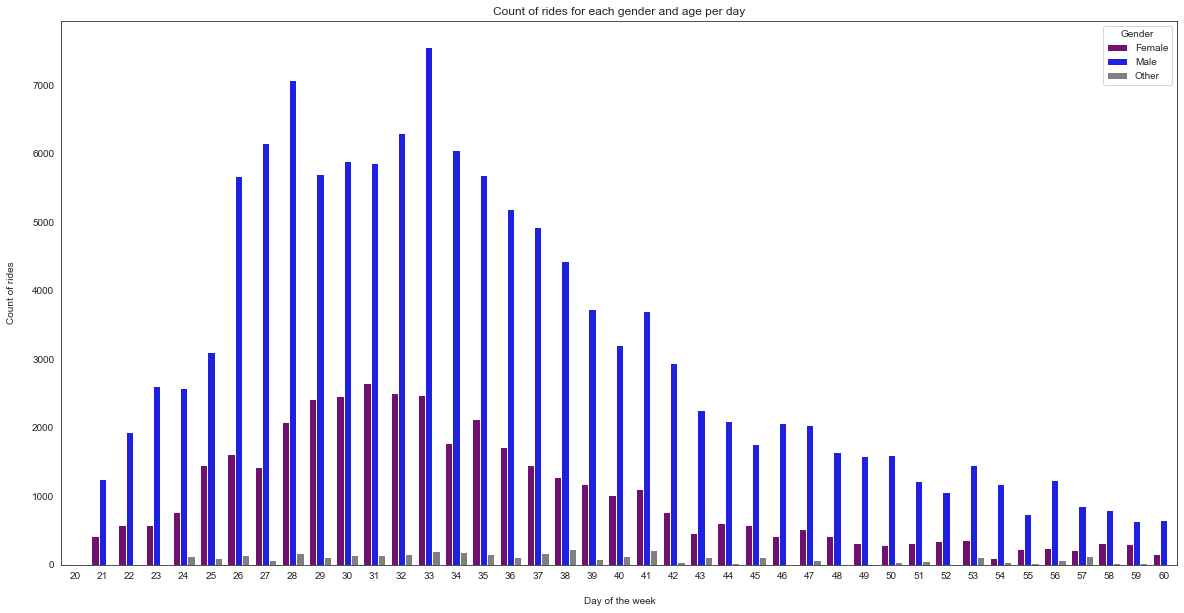

In [19]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="member_age", y=0, hue="member_gender", palette=colors, data=Genderdf2)
plt.title('Count of rides for each gender and age per day')
plt.xlabel('Day of the week', labelpad=16)
plt.ylabel('Count of rides', labelpad=16)
leg = ax.legend()
leg.set_title('Gender')

- Most female bike riders are 31 while males are of age 33. In general, riders are in their late 20s to mid 30s.

### What is the count of rides based on user type and day?

[Text(0.5, 0, 'Start day'), Text(0, 0.5, 'Count of rides')]

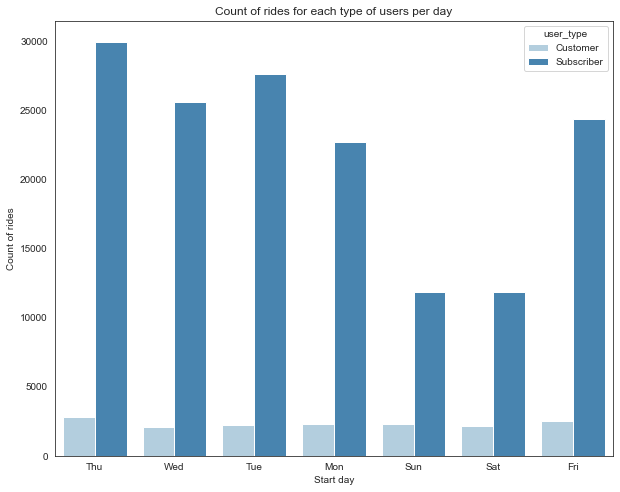

In [20]:
plt.figure(figsize=(10,8))
plt.title('Count of rides for each type of users per day')
d=sns.countplot(data = df_cleaned, x = 'start_time_day', hue = 'user_type', palette = 'Blues');
d.set(xlabel='Start day', ylabel='Count of rides')

- Subscriber tend not to start during the weekend while customers are less likely to start on wednesdays

### What is the trip duration for user type and gender?

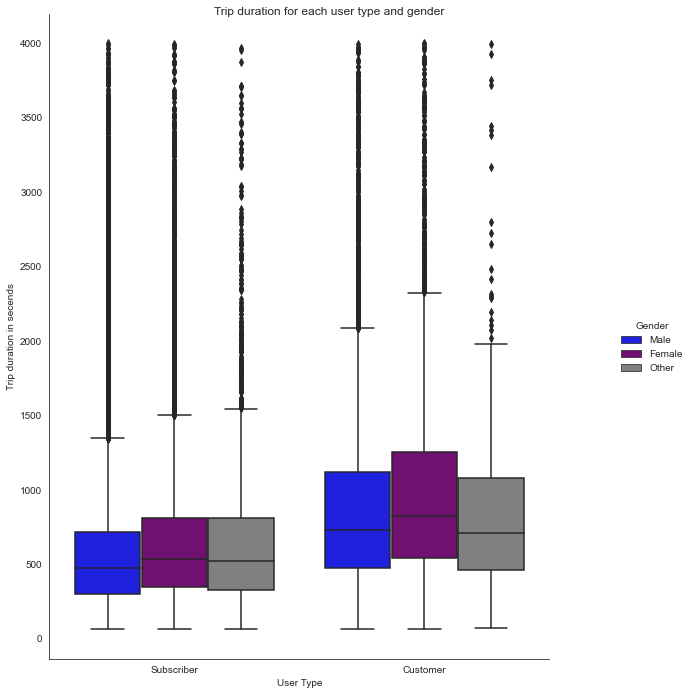

In [21]:
box = sns.catplot(data=data, x='user_type', y="duration_sec", hue="member_gender", kind="box", palette = colors)
box.set_axis_labels("User Type", "Trip duration in secends")
box._legend.set_title('Gender')
box.fig.suptitle('Trip duration for each user type and gender');
box.fig.set_size_inches(10,10)

- In general customers has a higher trip duration than customers. males and other gender has same maximum value of duration which is around 550 secends.

## Summary of observations from the plots

-	People tend to not go in bike trips during the weekends
-	People tend to go for bike trips early in the morning and the hours before the sunset
-	Subscribers have x8 more count of rides than customers
-	People in their early 30s make the majority of rides count.
-	Females make around quarter of the total distance traveled while males travel almost x3 more.
-	Most female bike riders are 31 while males are of age 33. In general, riders are in their late 20s to mid-30s.
-	Subscribers tend not to start during the weekend while customers are less likely to start on Wednesdays
-	In general customers has a higher trip duration than customers. males and other gender has same maximum value of duration which is around 550 seconds.